# Program your first neuron

## Numpy

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
import numpy as np
from util import *

Creates a one-dimensional numpy array containing the values:
1, 2 and 3 in that order.

In [3]:
my_matrix = np.array([1, 2, 3])
create_first_matrix(my_matrix)

SUCCESS


Expected output:
```
SUCCESS
```

Numpy arrays have many methods to display the dimensions of an array:
    
Display the dimensions of the array **b**

In [5]:
b = my_new_array()
b.shape

(2, 5)

Expected output:
```
    (2, 5)
```

We need to be able to create an array filled with random numbers.

Create a three array a1, a2 and a3 filled with random numbers.

**a1** must be of shape **(2, 2)**

**a2** must be of shape **(4,4)**

**a3** must be of shape **(5,2)**

In [21]:
rng = np.random.default_rng()

a1 = rng.integers(5, size=(2, 2))
a2 = rng.integers(5, size=(4, 4))
a3 = rng.integers(5, size=(5, 2))

check_random_matrix(a1, a2, a3)

SUCCESS


Expected output:
```
    SUCCESS
```

Last thing, we will do array multiplications.
We like lucky, Numpy does it for us.

Create the matrix a4 which is equal to the matrix a3 multiplied by the matrix a1:

In [22]:
a4 = np.matmul(a3, a1)
check_mul(a4)

SUCCESS


Expected output:
```
    SUCCESS
```

We need nothing more to start coding our neuron.

## Program your first neuron

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X: (1000, 2)
dimensions de y: (1000, 1)


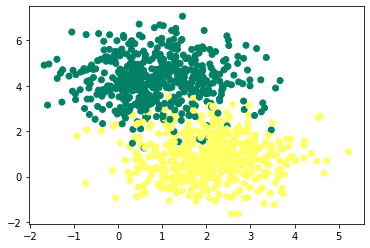

In [171]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

As said during the talk, a neuron is a function taking x parameters:

x<sub>1</sub>*w<sub>1</sub> + x<sub>2</sub> * w<sub>2</sub> ... + x<sub>n</sub> * w<sub>n</sub> + b.

We need to write a function that takes our data and initializes the array **W** and **b**.

**W** contains all the values **w**, so it contains as many data as there is variable **x**.







In [172]:
def initialisation(X):
    rng = np.random.default_rng()
    W = rng.integers(10, size=(X.shape[1], 1))
    b = rng.integers(10, size=(1,))
    return (W, b)

Always test your functions to check the shapes of the matrices or the values returned by your functions.

For example here we check the shapes of W and b.
(This step will not be repeated afterwards but I encourage you to do it by yourself.)

Display the shape of W and b:

In [173]:
(a, b) = initialisation(X)
print(a.shape)
print(b.shape)

(2, 1)
(1,)


Expected output:
```
    (2, 1)
    (1,)
```

We will now create the model of the neuron note:

Z = X * W + b

A = 1 / (1+e<sup>-Z</sup>)

In [174]:
import math
def model(X, W, b):
    Z = np.matmul(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

Witch shape have A?

I'm writing the log_loss function for you because there's not much point in knowing how it works.

Just remember that it allows you to calculate how wrong the model is.

In [175]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

Now we are going to write the correction function, we have calculated the error now we are going to calculate what to change.
We need **dw** defined by:
![alt text](./source/dw.png)
And **db** defined by:
![alt text](./source/db.png)

 (for **db** you can use np.sum)
 
m = number of label

y = label


In [176]:
def gradients(A, X, y):
    dW = np.matmul( (1 / y.size) * np.transpose(X), A - y )
    db = (1 / y.size) * np.sum(A - y)
    return (dW, db)

Now we can be update W and b

We have: 
the learning total (at which point the modifications must be taken into account)

dw and db = how much w and b must be modified

w and b = our two variables to modify

In [177]:
def update(dW, db, W, b, learning_rate):
    W = W - (dW * learning_rate)
    b = b - (db * learning_rate)
    return (W, b)

We can now call **model** to predict our label (0 or 1)

In [178]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

We have all the functions now we can train our neuron:

In [179]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for _ in range(n_iter):
        # call model
        A = model(X, W, b)
        #append to Lost the log_loss result
        Loss.append(log_loss(A, y))
        # calcul dw and db
        dw, db = gradients(A, X, y)
        # update the model
        W, b = update(dw, db, W, b, learning_rate)
        # repeat n_iter time

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

Now you can simply call your new neuron and train it.

You can see the limit create by your neuron

0.946


/tmp/ipykernel_122364/779446396.py:2: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
/tmp/ipykernel_122364/779446396.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


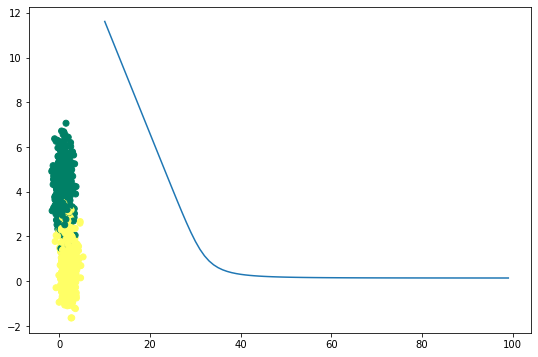

In [185]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

W, b = artificial_neuron(X, y)

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

Congrat, your have code your first neuron.

In [125]:
print("C'était trop cool!!!")

C'était trop cool!!!
